In [42]:
import pandas as pd

In [43]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

In [44]:
data = pd.read_csv('pokemon.csv')

In [45]:
data = data[data['Type 1'].isin(('Electric', 'Grass'))]

In [46]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,672,Skiddo,Grass,NaN,350,66,65,48,62,57,52,6,False
741,673,Gogoat,Grass,NaN,531,123,100,62,97,81,68,6,False
764,694,Helioptile,Electric,Normal,289,44,38,33,61,43,70,6,False
765,695,Heliolisk,Electric,Normal,481,62,55,52,109,94,109,6,False


In [47]:
data['Type 1'].value_counts()

Type 1
Grass       70
Electric    44
Name: count, dtype: int64

In [48]:
X = data[['HP', 'Attack', 'Defense', 'Speed']]
y = data['Type 1']

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(class_weight='balanced',random_state=42, min_samples_leaf=5, min_samples_split=10, max_features='sqrt')
tree_clf.fit(X, y)
tree_clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [50]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file='tree.dot', feature_names=['HP', 'Attack', 'Defense', 'Speed'], class_names=y.unique(), filled=True, rounded=True)

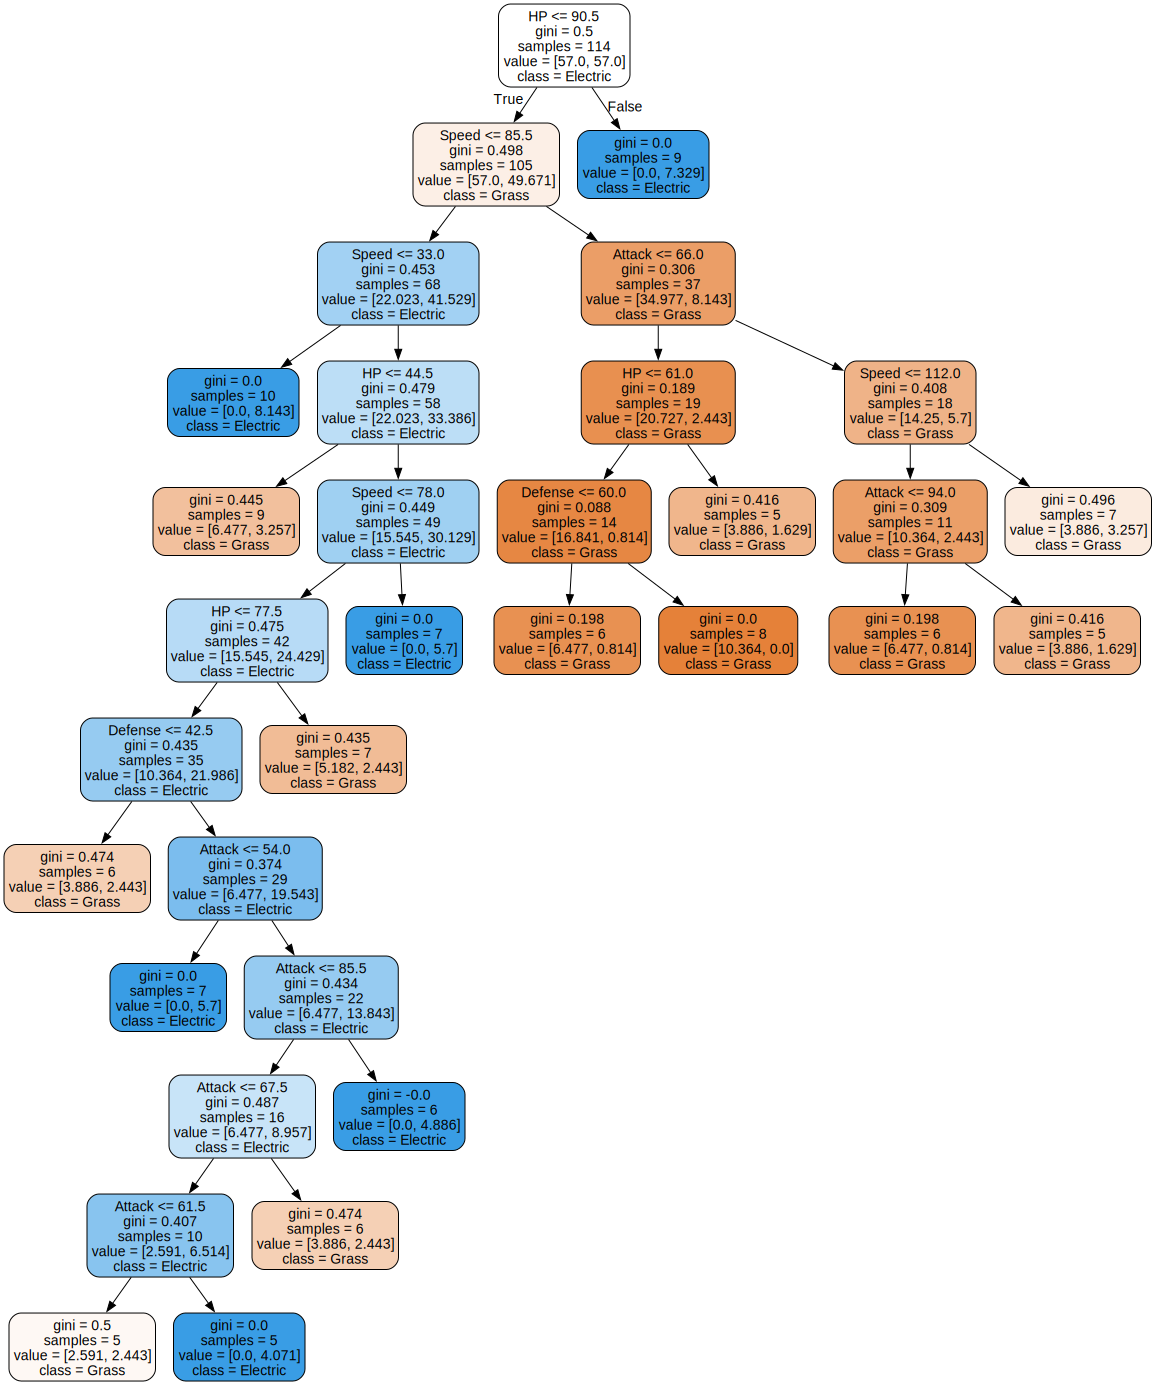

In [51]:
from graphviz import Source
Source.from_file('tree.dot')

In [52]:
predictions = tree_clf.predict(X)